# Práctica 1.1: MÉTODOS AVANZADOS DE PREPROCESADO DE IMAGEN MÉDICA (filtrado NLM)

Índice de los pasos a seguir:
1. Preparación de imágenes y adición de ruido
2. Filtrado NLM
3. Filtrado NLM samepatch comparison 
4. Filtrado NLM-CPP 
5. Resultados

## Adición de ruido

En esta sección vamos a proceder a añadir ruido a las imágenes que hemos obtenido del repositorio de bases de datos Open Neuro, para poder evaluar los resultados de filtrado que debemos realizar. \n

En primer lugar, cargaremos las imágenes con las que testearemos nuestro código. Se trata de imágenes de fMRI.

In [144]:
import os
import numpy as np #popular library for scientific computing
import nibabel as nib
import matplotlib #plotting library compatible with numpy
import matplotlib.pyplot as plt 
import skimage
from skimage import io
from skimage import filters
from nilearn import datasets
import modules
from nilearn import plotting
#import scipy.ndimage.filters as filters

In [145]:
img1 = nib.load(r'\Users\nakag\OneDrive\Escritorio\squizo\sub-01\anat\sub-01_T1w.nii.gz')
img2 = nib.load(r"\Users\nakag\OneDrive\Escritorio\squizo\sub-17\anat\sub-17_T1w.nii.gz")
img3 = nib.load(r"\Users\nakag\OneDrive\Escritorio\squizo\sub-26\anat\sub-26_T1w.nii.gz")
img4 = nib.load(r"\Users\nakag\OneDrive\Escritorio\squizo\sub-31\anat\sub-31_T1w.nii.gz")
img5 = nib.load(r"\Users\nakag\OneDrive\Escritorio\squizo\sub-13\anat\sub-13_T1w.nii.gz")
img6 = nib.load(r"\Users\nakag\OneDrive\Escritorio\squizo\sub-15\anat\sub-15_T1w.nii.gz")

In [146]:
print (img1)

<class 'nibabel.nifti1.Nifti1Image'>
data shape (176, 256, 256)
affine: 
[[ 9.96775329e-01 -1.48763147e-03 -8.02301541e-02 -8.26823959e+01]
 [-2.98805232e-03  9.98446643e-01 -5.56366481e-02 -1.06932190e+02]
 [ 8.01882967e-02  5.56969717e-02  9.95222449e-01 -1.48407990e+02]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]
metadata:
<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [  3 176 256 256   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : float32
bitpix          : 32
slice_start     : 0
pixdim          : [1.  1.  1.  1.  2.4 0.  0.  0. ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 10
cal_max         : 0.0
cal_min         : 0.0
slice

Vamos a estudiar algunas características de los datos que hemos cargado, además de mostrarlos por pantalla.

In [147]:
data = img1.get_fdata()

In [148]:
print(data.shape)

(176, 256, 256)


In [149]:
print(data.dtype, img1.get_data_dtype())

float64 float32


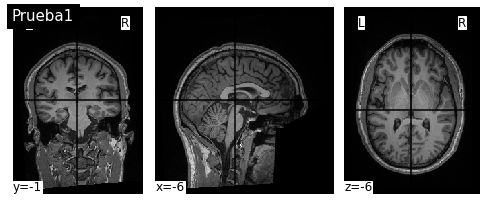

In [150]:
plotting.plot_img(img1, title="Prueba1",display_mode='ortho',cmap=plt.cm.gray )
plotting.show()                

Para poder añadirle el ruido a las imágenes, vamos a transformar los datos al formato array, y tras ello guardaremos un único corte (que hemos elegido de manera aleatoria) al que realizaremos la adición. 

> En caso de querer disminuir el tiempo de ejecución descomente una de las líneas para disminuír el tamaño de las imágenes y por ende, el número de píxeles a analizar.<pre><code>a = np.array(skimage.transform.resize(img1.dataobj, (50,70)))
a = np.array(skimage.transform.rescale(img.dataobj,0.3))
</code></pre> Y comente la línea:<pre><code>a = np.array(img1.dataobj)
</code></pre>

In [151]:
#Vamos a probar los algoritmos con imágenes más pequeñas para disminuir el tiempo de computación
a = np.array(skimage.transform.resize(img1.dataobj, (50,80)))
#a = np.array(skimage.transform.rescale(img.dataobj,0.3))
#a = np.array(img1.dataobj)
a.shape

(50, 80, 256)

Normalizaremos las frecuencias de las imágenes, de forma que el rango de este nuevo histograma sea [0,1] Es decir dividimos cada frecuencia entre el total de píxeles de la imagen.


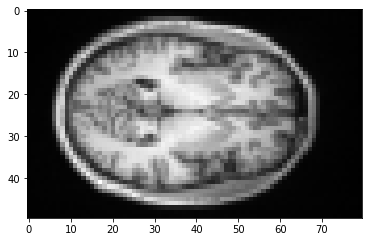

In [152]:
img_gray= a[:,:,128]
#normalizo la imagen
img_o=img_gray
img_o=img_o/np.max(img_o)
plt.imshow(img_o, cmap=plt.cm.gray)

Llamando a la función **.add_gnoise()** y la función **.salpimienta** del módulo modules.py que hemos creado, conseguimos añadir ruido gaussiano e impulsivo a la imagen. 

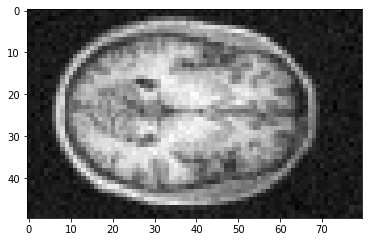

In [153]:
#Aplicar ruido gaussiano
img_gauss=modules.add_gnoise(img_o,0.03)
plt.imshow(img_gauss, cmap=plt.cm.gray)

C:\Users\nakag\OneDrive\Escritorio\IMagen\FormatoEntrega\modules.py:52: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  ruido_output[pos]=1
C:\Users\nakag\OneDrive\Escritorio\IMagen\FormatoEntrega\modules.py:56: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  ruido_output[pos]=0


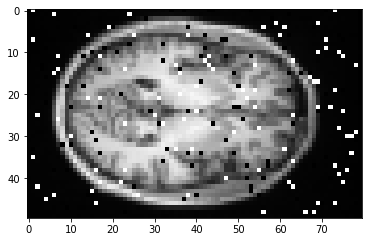

In [154]:
#Aplicar ruido impulsivo
img_salpimienta=modules.salpimienta(img_o,0.05)
plt.imshow(img_salpimienta, cmap=plt.cm.gray)

Creamos una función para agilizar el procedimiento anterior con todas las imágenes, **image_prep(img)**, que será la encargada de preparar y normalizar nuestras imágenes siguiendo los pasos indicados en celdas anteriores.

In [155]:
def image_prep(img):
#Vamos a probar los algoritmos con imágenes más pequeñas para disminuir el tiempo de computación
    a = np.array(skimage.transform.resize(img.dataobj, (50,80)))
    #a = np.array(img1.dataobj)
    img_gray= a[:,:,128]
    #normalizo la imagen
    img_o=img_gray
    img_o=img_o/np.max(img_o)
    
    return img_o


A continuación obtenemos un conjunto de imágenes ruidosas de **diferentes tipos de ruido e intensidades** para probar los algoritmos con algunas de ellas:

In [156]:
img_o2 = image_prep(img2)
img_gauss2=modules.add_gnoise(img_o2,0.03)
img_salpimienta2=modules.salpimienta(img_o2,0.05)
img_o3 = image_prep(img3)
img_gauss3=modules.add_gnoise(img_o3,0.07)
img_salpimienta3=modules.salpimienta(img_o3,0.1)
img_o4 = image_prep(img4)
img_gauss4=modules.add_gnoise(img_o4,0.1)
img_salpimienta4=modules.salpimienta(img_o4,0.15)
img_o5 = image_prep(img5)
img_gauss5=modules.add_gnoise(img_o5,0.15)
img_salpimienta5=modules.salpimienta(img_o5,0.2)
img_o6 = image_prep(img6)
img_gauss6=modules.add_gnoise(img_o6,0.2)
img_salpimienta6=modules.salpimienta(img_o6,0.25)

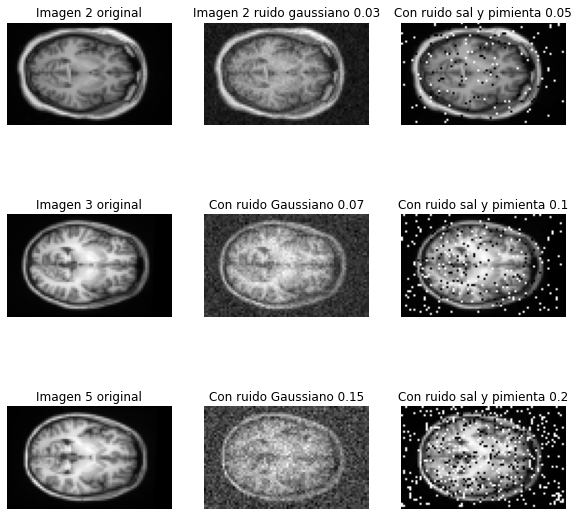

In [157]:
fig = plt.figure(figsize=(10,10))
plt.subplot(331)
plt.imshow(img_o2,cmap=plt.cm.gray)
plt.title('Imagen 2 original'), plt.axis('off')
plt.subplot(332)
plt.title('Imagen 2 ruido gaussiano 0.03'), plt.axis('off')
plt.imshow(img_gauss2, cmap=plt.cm.gray)
plt.subplot(333)
plt.imshow(img_salpimienta2,cmap=plt.cm.gray)
plt.title('Con ruido sal y pimienta 0.05'), plt.axis('off')
plt.subplot(334)
plt.title('Imagen 3 original'), plt.axis('off')
plt.imshow(img_o3, cmap=plt.cm.gray)
plt.subplot(335)
plt.imshow(img_gauss3,cmap=plt.cm.gray)
plt.title('Con ruido Gaussiano 0.07'), plt.axis('off')
plt.subplot(336)
plt.title('Con ruido sal y pimienta 0.1'), plt.axis('off')
plt.imshow(img_salpimienta3, cmap=plt.cm.gray)
plt.subplot(337)
plt.imshow(img_o5,cmap=plt.cm.gray)
plt.title('Imagen 5 original'), plt.axis('off')
plt.subplot(338)
plt.title('Con ruido Gaussiano 0.15'), plt.axis('off')
plt.imshow(img_gauss5, cmap=plt.cm.gray)
plt.subplot(339)
plt.title('Con ruido sal y pimienta 0.2'), plt.axis('off')
plt.imshow(img_salpimienta5, cmap=plt.cm.gray)


## Filtrado Non-Local Means

En este apartado vamos a mostrar los resultados de realizar un filtrado NLM en algunas de las imágenes. Debemos saber que el **filtrado Non-Local Means** consiste en filtrar la imagen mediante un promedio ponderado de los diferentes píxeles de la imagen en función de su similitud con el pixel original. Es decir, vamos a ir buscando a lo largo de la imagen píxeles que sean similares al pixel particular que quiero filtrar, para así darle mucho más peso a aquellos que tengan mayor similitud al original.

Es decir, el valor para un píxel matemáticamente hablando se calcula como:

\begin{equation*}
NL[v](i)= \sum_{j\in I} w(i,j)v(j)
\end{equation*}

donde ***w(i,j)*** depende de la similitud entre el pixel a filtrar ***v(i)*** y el píxel con el que estoy comparando ***v(j)***.

***
>La hipótesis que vamos a asumir es que nuestro píxel debe ser similar a píxeles similares, pero no necesariamente a sus vecinos.
***

Para ello hemos creado la función **.nlm(img_ori, h_square)** en el archivo modules.py. En esta función tenemos en cuenta dos parámetros:
* img_ori: que hace referencia a la imagen ruidosa que queremos filtrar. 
* h_square: se trata del parámetro de similitud asociado al **grado de filtrado** que queremos aplicar.

Para programar este filtro debemos tener en cuenta el flujo que vamos a seguir:

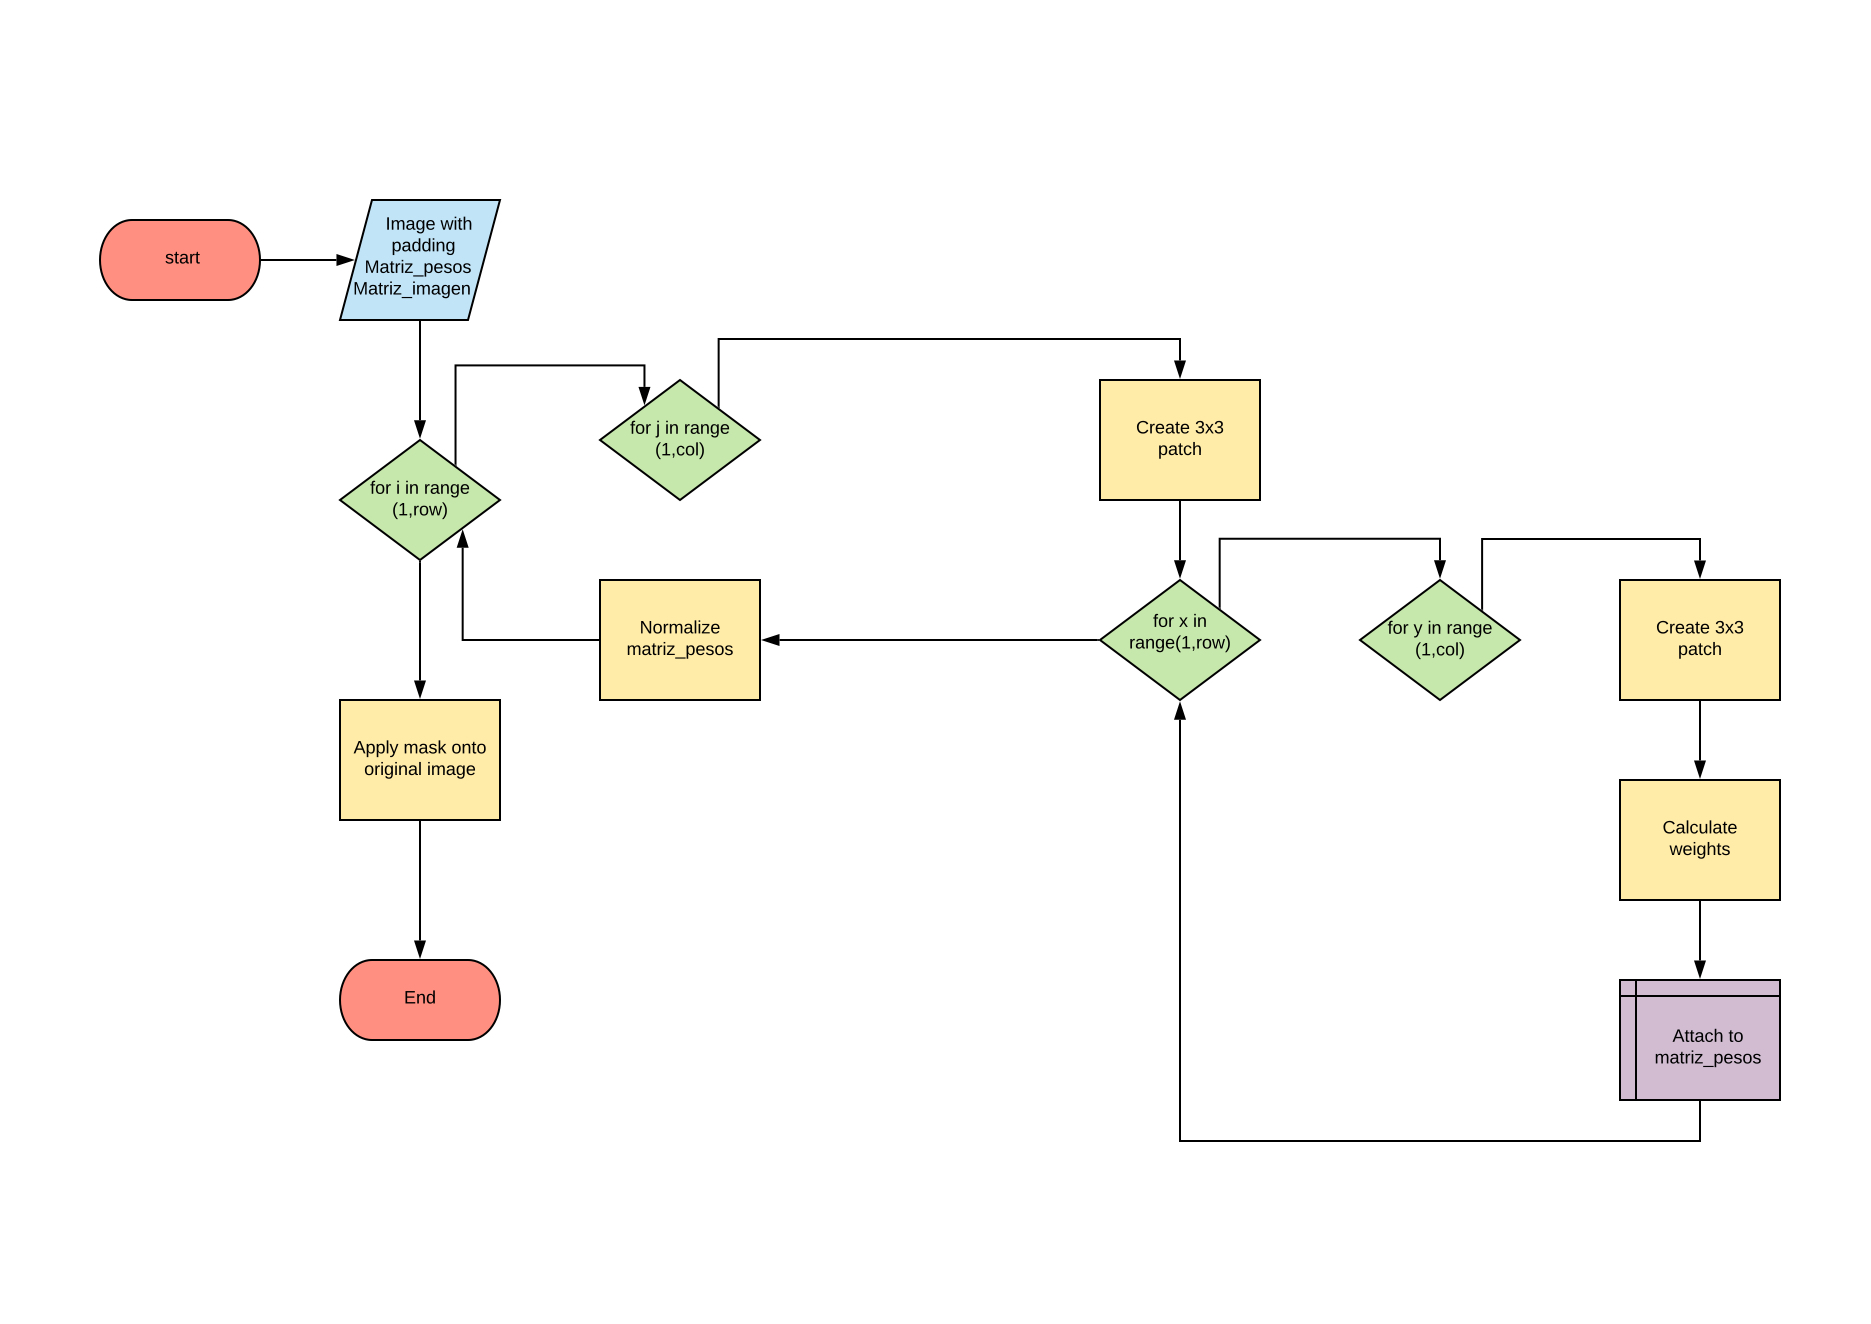

En resumen, el procedimiento es el siguiente:
1. Definimos el cálculo de los pesos ***w(i,j)***:
\begin{equation*}
w(i,j) = \frac{1}{Z(i)}e^{- \frac{d(i,j)}{h^2}}
\end{equation*}
donde $h^2$ es un parámetro de similitud asociado al grado de filtrado.

2. $d(i,j)$ es la distancia euclídea entre los píxeles de un parche centrado en $v(i)$ y los de otro centrado en $v(j)$.
3. Finalmente debemos tener en cuenta que $Z(i)$ en el punto 1 hace referencia a la constante de normalización, y se define como la suma de todos los pesos.

In [158]:
img_pad = np.pad(img_gauss,1, mode='reflect')
matriz_imagen1 = modules.nlm(img_gauss,img_pad, 80)

img_pad = np.pad(img_gauss6,1, mode='reflect')
matriz_imagen2 = modules.nlm(img_gauss6,img_pad, 2)

Comparemos las imagenes ruidosas originales (en este caso con un ruido gaussiano) con las imagenes filtradas con nuestro algoritmo:

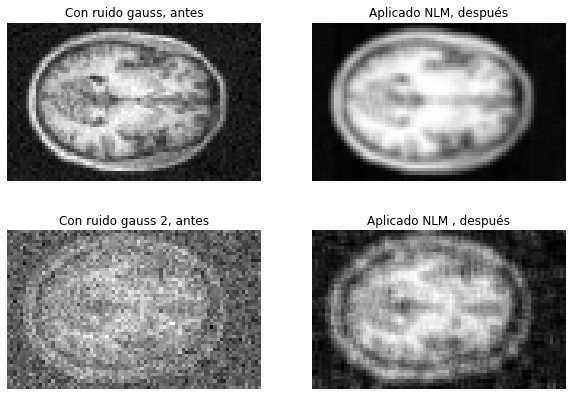

In [159]:
fig = plt.figure(figsize=(10,7))
plt.subplot(221)
plt.imshow(img_gauss,cmap=plt.cm.gray)
plt.title('Con ruido gauss, antes'), plt.axis('off')
plt.subplot(222)
plt.title('Aplicado NLM, después'), plt.axis('off')
plt.imshow(matriz_imagen1, cmap=plt.cm.gray)
plt.subplot(223)
plt.imshow(img_gauss6,cmap=plt.cm.gray)
plt.title('Con ruido gauss 2, antes'), plt.axis('off')
plt.subplot(224)
plt.title('Aplicado NLM , después'), plt.axis('off')
plt.imshow(matriz_imagen2, cmap=plt.cm.gray)

Realizamos igualmente una comparación con imágenes con ruido sal y pimienta. Se debe destacar la **importancia del parámetro de filtrado h2**, ya que a mayor ruido mejoraremos la calidad de nuestro filtrado disminuyendo dicho filtrado. Pero, ¿a qué se debe esto? Observemos la parte exponencial de la ecuación que utilizamos a la hora de calcular los pesos:
\begin{equation*}
e^{- \frac{d(i,j)}{h^2}}
\end{equation*}
Como vemos, cuanto mayor sea el parámetro $h^2$, mayor será el exponente de la exponencial y por ende, como resultado obtendremos un número más pequeño. Esto se traduce en que el peso por el que vamos a ponderar nuestro píxel objetivo va a ser menor. 

Por ello, podríamos concluir que el parámetro óptimo dependerá de la cantidad de ruido de nuestra imagen (proporcional a la desviación estándar de dicho ruido).

In [160]:
img_pad = np.pad(img_salpimienta,1, mode='reflect')
matriz_imagen3 = modules.nlm(img_salpimienta,img_pad, 80)

img_pad = np.pad(img_salpimienta6,1, mode='reflect')
matriz_imagen4 = modules.nlm(img_salpimienta6,img_pad, 2)

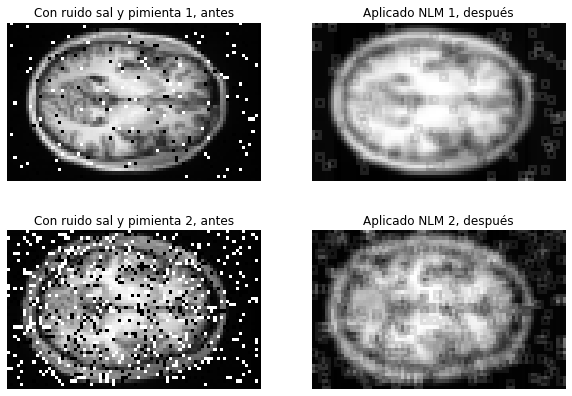

In [161]:
fig = plt.figure(figsize=(10,7))
plt.subplot(221)
plt.imshow(img_salpimienta,cmap=plt.cm.gray)
plt.title('Con ruido sal y pimienta 1, antes'), plt.axis('off')
plt.subplot(222)
plt.title('Aplicado NLM 1, después'), plt.axis('off')
plt.imshow(matriz_imagen3, cmap=plt.cm.gray)
plt.subplot(223)
plt.imshow(img_salpimienta6,cmap=plt.cm.gray)
plt.title('Con ruido sal y pimienta 2, antes'), plt.axis('off')
plt.subplot(224)
plt.title('Aplicado NLM 2, después'), plt.axis('off')
plt.imshow(matriz_imagen4, cmap=plt.cm.gray)

Comparando la imagen filtrada con NLM con la misma procesada con **filtros suavizantes estándar**, podemos observar varias cosas:
* Con el algoritmo NLM vemos un suavizado mucho más específico y una definición mucho mayor de los bordes.
* Cuando observamos los filtros suavizantes estándar, vemos que estamos asumiendo que cuando filtramos un determinado píxel, sus vecinos son iguales a dicho píxel pero que las diferencias se deben al ruido. Esto no sería correcto en imágenes **no** homogéneas, ya que las diferencias no se corresponden a ruido sino a bordes y estructuras.


(Text(0.5, 1.0, 'Gaussian filtered image'), (-0.5, 79.5, 49.5, -0.5))

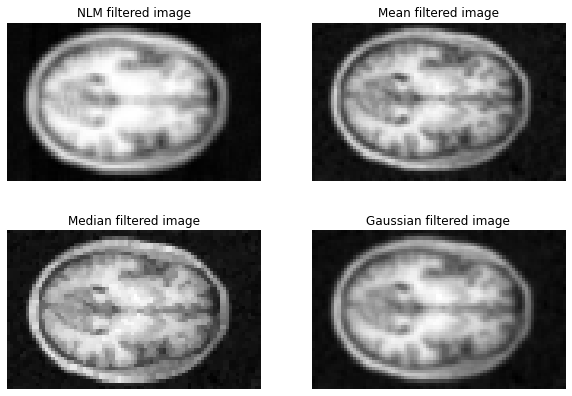

In [162]:
img_pad = np.pad(img_gauss,1, mode='reflect')
matriz_imagen1 = modules.nlm(img_gauss,img_pad, 80)
img_meanfiltered = modules.mean_filter(img_gauss,2)
img_gaussianfiltered = modules.gaussian_filter(img_gauss,0.75)
img_medianfiltered = modules.median_filter(img_gauss,2)


fig = plt.figure(figsize=(10,7))
plt.subplot(221)
plt.imshow(matriz_imagen1, cmap=plt.cm.gray)
plt.title('NLM filtered image'), plt.axis('off')
plt.subplot(222)
plt.imshow(img_meanfiltered, cmap=plt.cm.gray)
plt.title('Mean filtered image'), plt.axis('off')
plt.subplot(223)
plt.imshow(img_medianfiltered, cmap=plt.cm.gray)
plt.title('Median filtered image'), plt.axis('off')
plt.subplot(224)
plt.imshow(img_gaussianfiltered, cmap=plt.cm.gray)
plt.title('Gaussian filtered image'), plt.axis('off')
  

## Modificaciones de NLM: Comparación con el mismo parche

Uno de los problemas que encontramos al aplicar NLM es que, iterando sobre todos los píxeles de la imagen, acabamos comparando el parche original consigo mismo. 
***
Para solucionar esto tenemos dos alternativas:
* Eliminar el parche original de la búsqueda.
* Ponderando el parche original utilizando el **valor máximo de similitud** que se haya encontrado en el resto de la imagen.
\begin{equation*}
w(i,j) = max(w(i,j)\forall j\neq i)
\end{equation*}
***
Nosotras vamos a implemantar la segunda alternativa a continuación.

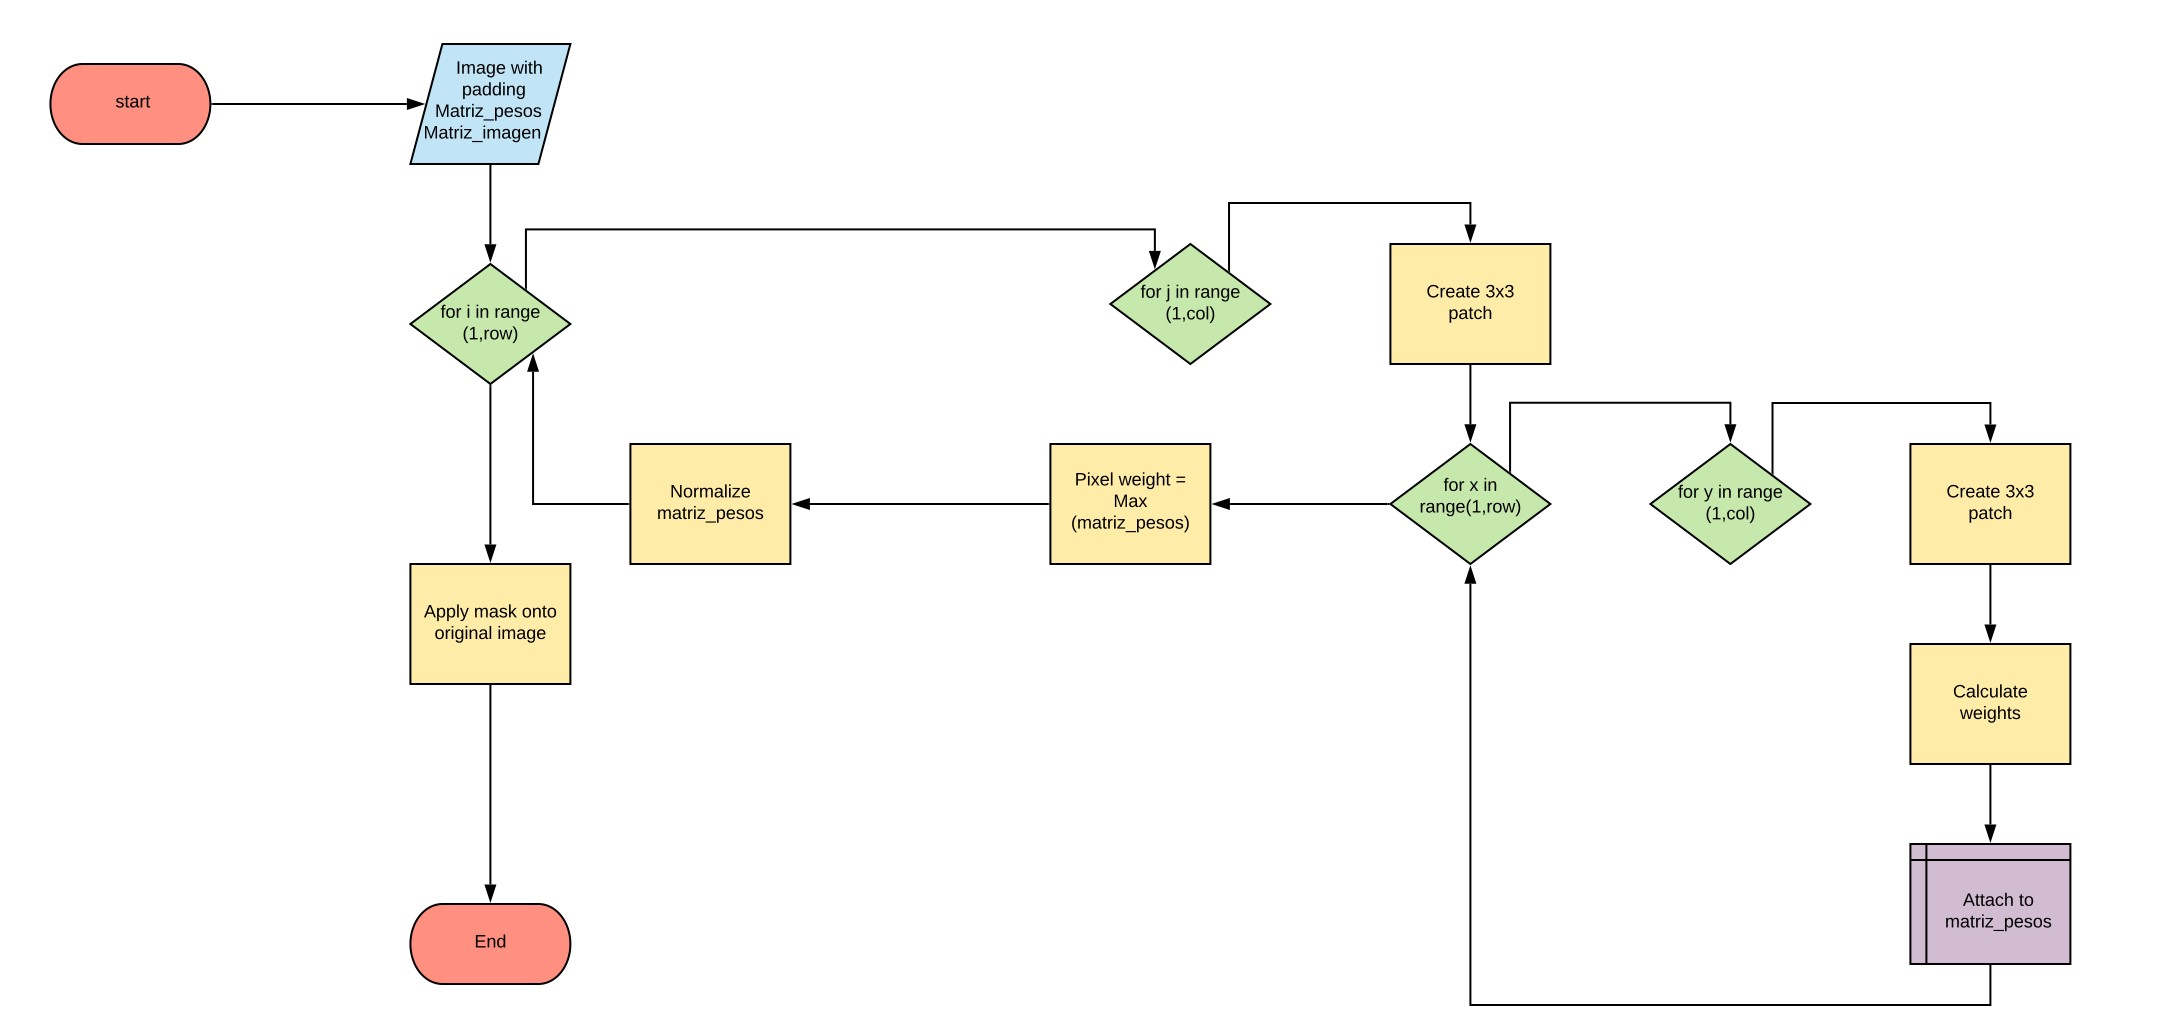

Como hemos hecho anteriormente vamos a filtrar las imágenes, esta vez con la función **.nlm_samepatch()** de **modules.py**.  

In [167]:
img_pad = np.pad(img_gauss,1, mode='reflect')
nlm_samepatch = modules.nlm_samepatch(img_gauss,img_pad, 80)

img_pad = np.pad(img_salpimienta4,1, mode='reflect')
nlm_samepatch2 = modules.nlm_samepatch(img_salpimienta4,img_pad, 2)

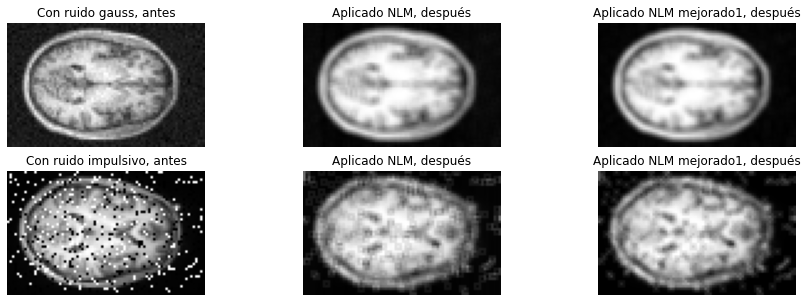

In [168]:
img_pad = np.pad(img_salpimienta4,1, mode='reflect')
matriz_imagen5 = modules.nlm(img_salpimienta4,img_pad, 2)

fig = plt.figure(figsize=(15,5))
plt.subplot(231)
plt.imshow(img_gauss,cmap=plt.cm.gray)
plt.title('Con ruido gauss, antes'), plt.axis('off')
plt.subplot(232)
plt.title('Aplicado NLM, después'), plt.axis('off')
plt.imshow(matriz_imagen1, cmap=plt.cm.gray)
plt.subplot(233)
plt.title('Aplicado NLM mejorado1, después'), plt.axis('off')
plt.imshow(nlm_samepatch, cmap=plt.cm.gray)
plt.subplot(234)
plt.imshow(img_salpimienta4,cmap=plt.cm.gray)
plt.title('Con ruido impulsivo, antes'), plt.axis('off')
plt.subplot(235)
plt.title('Aplicado NLM, después'), plt.axis('off')
plt.imshow(matriz_imagen5, cmap=plt.cm.gray)
plt.subplot(236)
plt.title('Aplicado NLM mejorado1, después'), plt.axis('off')
plt.imshow(nlm_samepatch2, cmap=plt.cm.gray)

Como vemos, **no se aprecia una diferencia significativa entre los algoritmos**. Esto se debe a que realmente la modificación que estamos realizando es únicamente un pequeño cambio en las ponderaciones. 

## Modificaciones de NLM: NLM-CPP

Para solventar el problema que se nos presenta al aplicar el filtro NLM sobre un píxel que es muy diferente a los píxeles de su entorno, vamos a programar lo que se llama **NLM-CPP**. 
>Este filtro consigue evitar un suavizado excesivo de los puntos brillantes, utilizando para ello un sistema de ponderado sobre los pesos originales $w(i,j)$ del NLM sencillo, para que de esta manera, dependan de la **similitud de los píxeles centrales**.

\begin{equation*}
w(i,j)^{CPP} = \eta(i,j)w(i,j)\forall j\neq i
\end{equation*}
donde
\begin{equation*}
\eta(i,j) = \frac{1}{1+(\lbrack|v(i)-v(j)|/D_0\rbrack)^{2\alpha}}
\end{equation*}
***

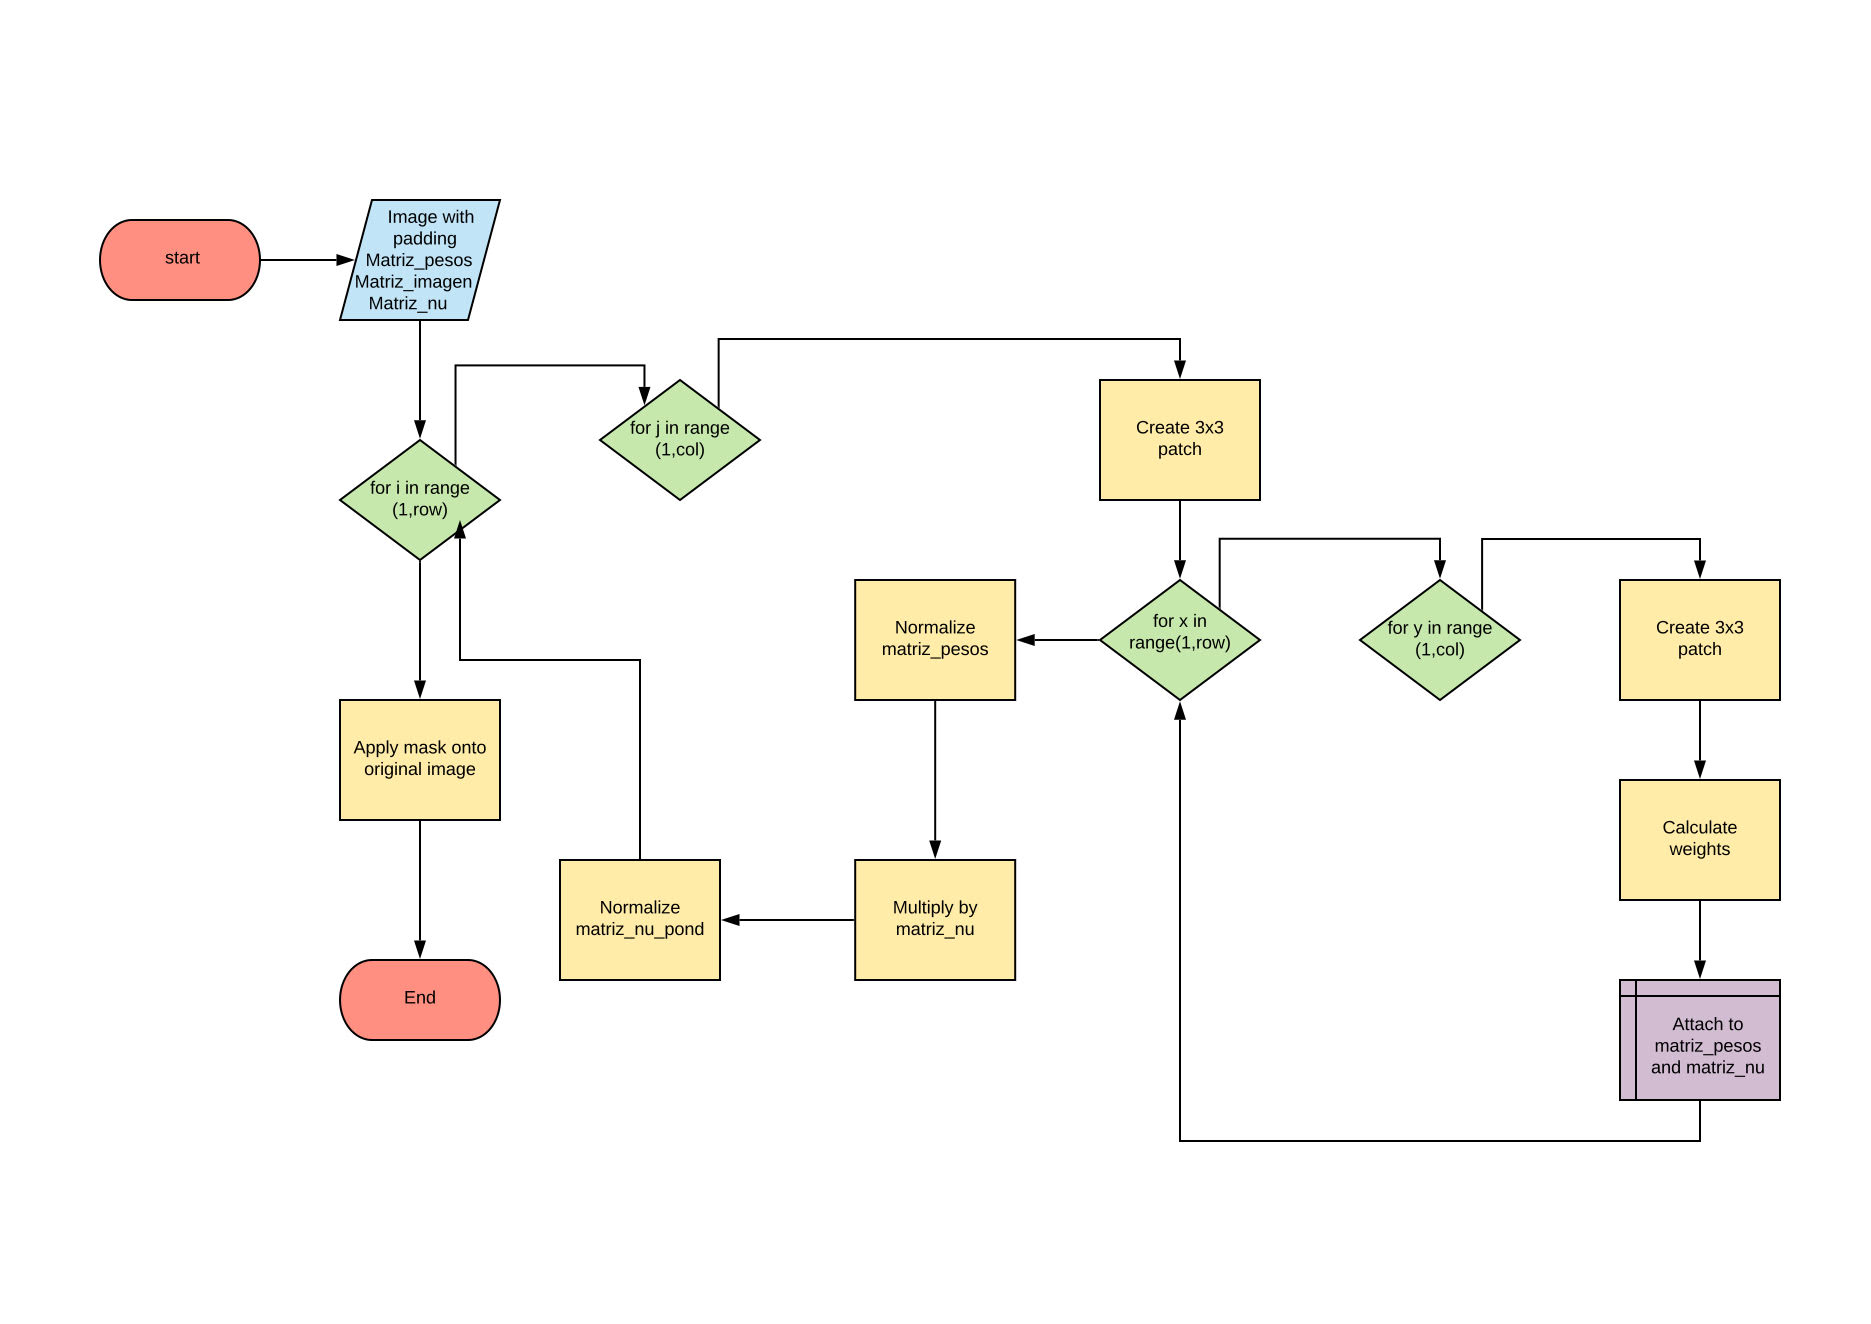

In [127]:
nlm_cpp = modules.nlm_cpp(img_gauss, img_pad, 5, 0.2, 10)

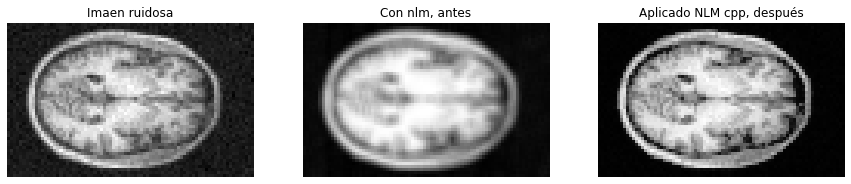

In [171]:
fig = plt.figure(figsize=(15,14))
plt.subplot(131)
plt.imshow(img_gauss,cmap=plt.cm.gray)
plt.title('Imaen ruidosa'), plt.axis('off')
plt.subplot(132)
plt.imshow(matriz_imagen1,cmap=plt.cm.gray)
plt.title('Con nlm, antes'), plt.axis('off')
plt.subplot(133)
plt.title('Aplicado NLM cpp, después'), plt.axis('off')
plt.imshow(nlm_cpp, cmap=plt.cm.gray)

In [129]:
img_pad = np.pad(img_salpimienta,1, mode='reflect')
nlm_cpp1 = modules.nlm_cpp(img_salpimienta, img_pad, 5,10, 10)

In [130]:
nlm_sal = modules.nlm(img_salpimienta,img_pad, 5)

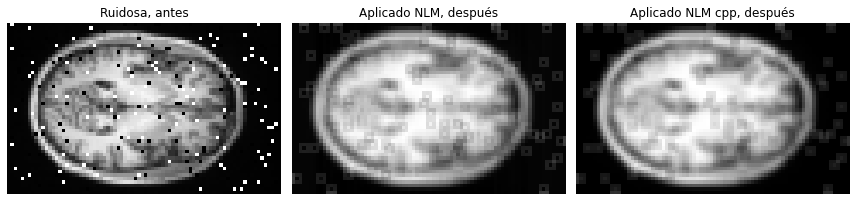

In [175]:
fig = plt.figure(figsize=(12,11))
plt.subplot(131)
plt.imshow(img_salpimienta,cmap=plt.cm.gray)
plt.title('Ruidosa, antes'), plt.axis('off')
plt.subplot(132)
plt.title('Aplicado NLM, después'), plt.axis('off')
plt.imshow(nlm_sal, cmap=plt.cm.gray)
plt.subplot(133)
plt.title('Aplicado NLM cpp, después'), plt.axis('off')
plt.imshow(nlm_cpp1, cmap=plt.cm.gray)
# Adjust subplot parameters to give specified padding
plt.tight_layout()  

## Resultados finales

Vamos a comparar nuestro último resultado de NLM-CPP con el resultado que arroja la función **.denoise_nl_means()** del paquete **skimage.restoration**.

In [132]:
denoise_img = skimage.restoration.denoise_nl_means(img_salpimienta, patch_size=3, h = 0.2)

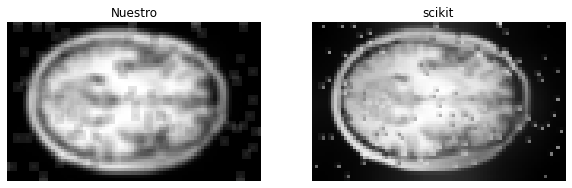

In [133]:
fig = plt.figure(figsize=(10,10))
plt.subplot(121)
plt.imshow(nlm_cpp1,cmap=plt.cm.gray)
plt.title('Nuestro'), plt.axis('off')
plt.subplot(122)
plt.title('scikit'), plt.axis('off')
plt.imshow(denoise_img, cmap=plt.cm.gray)

In [134]:
def all_filters(img):
    img_pad = np.pad(img,1, mode='reflect')
    matriz_imagen1 = modules.nlm(img,img_pad, 10)
    nlm_samepatch = modules.nlm_samepatch(img,img_pad, 1)
    nlm_cpp = modules.nlm_cpp(img, img_pad, 5, 10, 10)

    return matriz_imagen1, nlm_samepatch, nlm_cpp

(Text(0.5, 1.0, 'NLM-CPP image'), (-0.5, 79.5, 49.5, -0.5))

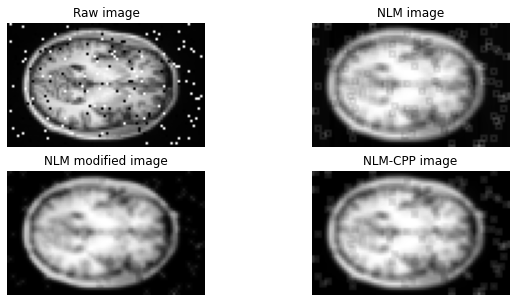

In [177]:
x, y, z = all_filters(img_salpimienta)


fig = plt.figure(figsize=(10,5))
plt.subplot(221)
plt.imshow(img_salpimienta, cmap=plt.cm.gray)
plt.title('Raw image'), plt.axis('off')
plt.subplot(222)
plt.imshow(x, cmap=plt.cm.gray)
plt.title('NLM image'), plt.axis('off')
plt.subplot(223)
plt.imshow(y, cmap=plt.cm.gray)
plt.title('NLM modified image'), plt.axis('off')
plt.subplot(224)
plt.imshow(z, cmap=plt.cm.gray)
plt.title('NLM-CPP image'), plt.axis('off')

 